In [1]:
import warnings
from shapely.errors import ShapelyDeprecationWarning

warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython import display
from scipy import signal
import seaborn as  sns
import cv2
import cartopy.feature as cf
import xarray as xr
import  netCDF4 as ncc
import cartopy as cct
import statistics as st
from scipy.stats import norm
from scipy.io import netcdf as ncf
from mpl_toolkits.basemap import Basemap as bsm
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

C:\Users\gasan\anaconda3\lib\site-packages\ecmwflibs\__init__.py:83: UserWarning: DLL load failed while importing _ecmwflibs: The specified procedure could not be found.
  warnings.warn(str(e))
C:\Users\gasan\anaconda3\lib\site-packages\xarray\backends\cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


# Question 1.

In [6]:
dataset1=pd.read_csv('sampledata.txt',header=None)# Read the data
dataset2=pd.read_csv('sampledata2.txt',header=None)# Read the data

In [7]:
dataset1.columns=['Temp1']  #Name the column
dataset1.head(10)   #display first 10 elements

,Temp1
0,27.7418
1,28.8704
2,27.1007
3,27.0132
4,27.3996
5,28.4364
6,28.6897
7,26.0483
8,27.5327
9,28.1471


In [8]:
dataset2.columns=['Temp2']  #Name the column
dataset2.head(10)   #display first 10 elements

,Temp2
0,27.9117
1,28.2062
2,28.1308
3,27.7130
4,27.7183
5,27.9801
6,28.5383
7,28.1899
8,28.0305
9,28.1160


In [41]:
dataset=[dataset1,dataset2]
Main_data=pd.concat(dataset,axis=1)

In [42]:
Main_data.head()

,Temp1,Temp2
0,27.7418,27.9117
1,28.8704,28.2062
2,27.1007,28.1308
3,27.0132,27.7130
4,27.3996,27.7183


In [11]:
Main_data['Dataset_Anomaly1']=(dataset1['Temp1']-dataset1['Temp1'].mean(axis=0))/dataset1['Temp1'].std(axis=0)
Main_data['Dataset_Anomaly2']=(dataset2['Temp2']-dataset2['Temp2'].mean(axis=0))/dataset2['Temp2'].std(axis=0)

In [8]:
Main_data

,Temp1,Temp2,Dataset_Anomaly1,Dataset_Anomaly2
0,27.7418,27.9117,-0.041604,-1.115023
1,28.8704,28.2062,1.426208,-0.020590
2,27.1007,28.1308,-0.875393,-0.300795
3,27.0132,27.7130,-0.989192,-1.853440
4,27.3996,27.7183,-0.486655,-1.833744
5,28.4364,27.9801,0.861765,-0.860832
6,28.6897,28.5383,1.191197,1.213574
7,26.0483,28.1899,-2.244102,-0.081165
8,27.5327,28.0305,-0.313551,-0.673533
9,28.1471,28.1160,0.485513,-0.355795


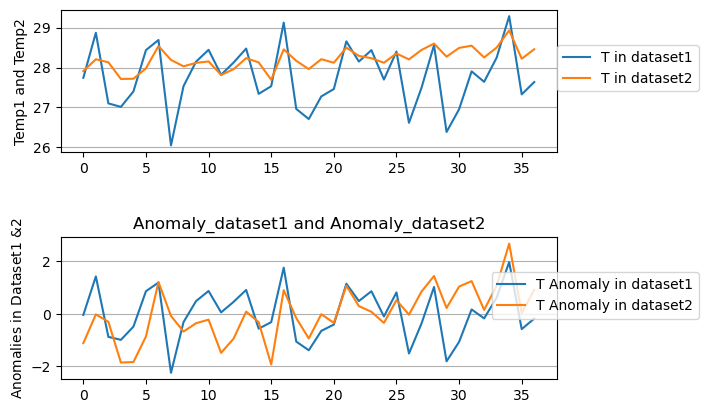

In [9]:
plt.subplots_adjust(hspace=0.6,wspace=0.6)
plt.subplot(211)
sns.lineplot(data=Main_data.iloc[:,0])
sns.lineplot(data=Main_data.iloc[:,1])
plt.grid(axis='y')
plt.legend(['T in dataset1','T in dataset2'],loc='upper right',bbox_to_anchor=(1.3,0.8))
plt.ylabel('Temp1 and Temp2')

plt.subplot(212)
sns.lineplot(data=Main_data.iloc[:,2])
sns.lineplot(data=Main_data.iloc[:,3])
plt.grid(axis='y')
plt.legend(['T Anomaly in dataset1','T Anomaly in dataset2'],loc='upper right',bbox_to_anchor=(1.3,0.8))
plt.title('Anomaly_dataset1 and Anomaly_dataset2')
plt.ylabel(r'Anomalies in Dataset1$\ & $2')
plt.ion()

In [10]:
def DatasetsCorrelation(datasets):
    corr=datasets.corr()
    plt.title('Correlation between two datasets')
    sns.heatmap(corr, annot=True)
   

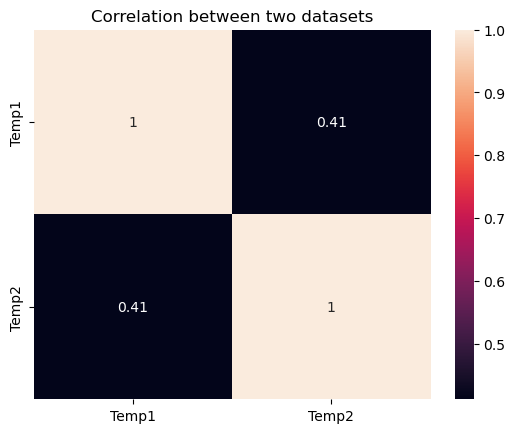

In [11]:
DatasetsCorrelation(Main_data.iloc[:,:2])

In [12]:
def Scatterplot(datasets):
    
    
    sns.scatterplot(x=datasets.iloc[:,0],y=datasets.iloc[:,1],data=datasets)
    sns.regplot(data = datasets, x = 'Temp1', y ='Temp2')
    plt.title('Scatter plot for dataset1\n\n')
    

    plt.show()

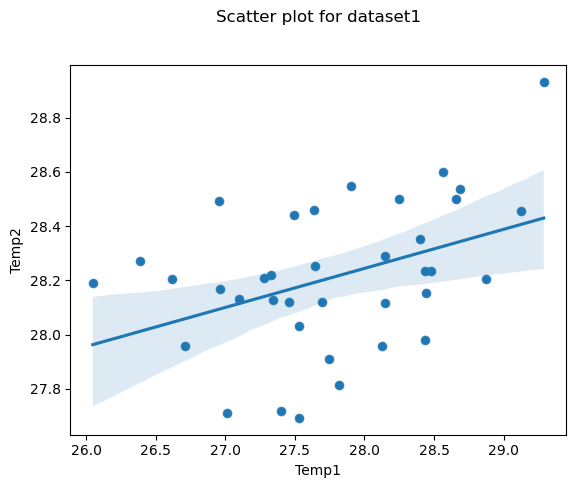

In [19]:
Scatterplot(Main_data.iloc[:,:2])

In [20]:
Main_data[['Temp2','Temp1']].cov()

,Temp2,Temp1
Temp2,0.072409,0.085144
Temp1,0.085144,0.591207


In [39]:
X=Main_data['Temp1'].values
y=Main_data['Temp2'].values
x_mean=X.mean()
y_mean=y.mean()
print('X_mean=',x_mean)
print('y_mean=',y_mean)

cov_matrix=Main_data[['Temp2','Temp1']].cov().values



cov_x_y=cov_matrix[0,1]

var_x=cov_matrix[1,1]

var_y=cov_matrix[0,0]

Var_xx=np.var(dataset1.values)
print('cov_matrix=\n',cov_matrix,np.var(dataset1.values))
slope=cov_x_y/var_x

slope2=cov_x_y/Var_xx

intercept=y_mean-slope*x_mean

intercept2=y_mean-slope2*x_mean

Estimated_y=slope*X+intercept

Estimated_y2=slope2*X+intercept2


print('slope=',slope,'\n')

print('Intercept=',intercept)

X_mean= 27.773789189189184
y_mean= 28.21174054054054
cov_matrix=
 [[0.07240896 0.08514437]
 [0.08514437 0.59120688]] 0.5752283204236669
slope= 0.1440178967713077 

Intercept= 24.21181783614383


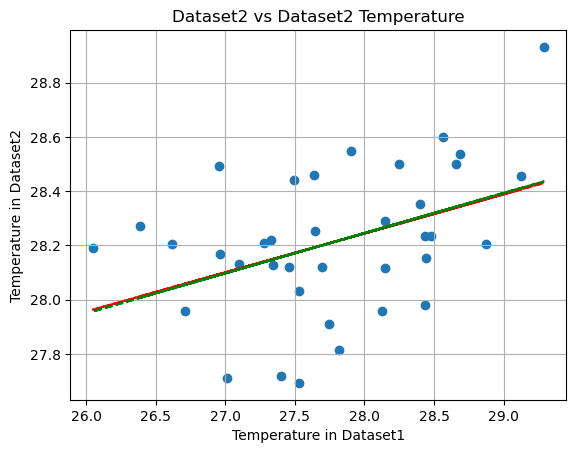

In [43]:
plt.plot(X,Estimated_y,'r--')
plt.plot(X,Estimated_y2,'g--')
plt.title('Dataset2 vs Dataset2 Temperature')
plt.xlabel('Temperature in Dataset1')
plt.ylabel('Temperature in Dataset2')
plt.grid('on')
plt.scatter(X,y)
plt.show()

In [13]:
def Correlation(dataset1,dataset2):
    normalized_1=(dataset1['Temp1']-dataset1['Temp1'].mean(axis=0))/dataset1['Temp1'].std(axis=0)
    normalized_2=(dataset2['Temp2']-dataset2['Temp2'].mean(axis=0))/dataset2['Temp2'].std(axis=0)
    return np.correlate(normalized_1,normalized_2,'full')

In [14]:
lags = signal.correlation_lags(len(Main_data['Temp1']),len(Main_data['Temp2']))

In [17]:
data=Correlation(dataset1,dataset2)

In [18]:
import scipy

In [19]:
scipy.stats.spearmanr(dataset1, dataset2)

SpearmanrResult(correlation=0.38525367472735894, pvalue=0.018538793201586044)

In [20]:
scipy.stats.pearsonr(dataset1.values.ravel(), dataset2.values.ravel())

PearsonRResult(statistic=0.41151913753306013, pvalue=0.011390299362193613)

# Question.2

In [2]:
data11=xr.open_dataset('era5_tas_1959_2021_25deg.nc')

C:\Users\gasan\anaconda3\lib\site-packages\ecmwflibs\__init__.py:83: UserWarning: DLL load failed while importing _ecmwflibs: The specified procedure could not be found.
  warnings.warn(str(e))
C:\Users\gasan\anaconda3\lib\site-packages\xarray\backends\plugins.py:65: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
C:\Users\gasan\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [10]:
aaa=data11.groupby('time.year').reduce(np.std)

In [18]:
aaa

<xarray.Dataset>
Dimensions:  (lon: 144, lat: 73, year: 63)
Coordinates:
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
  * year     (year) int64 1959 1960 1961 1962 1963 ... 2017 2018 2019 2020 2021
Data variables:
    t2m      (year, lat, lon) float32 9.948 9.948 9.948 ... 10.18 10.18 10.18

In [ ]:
def CreateDataset(datafile,year):
    data=xr.open_dataset(datafile)
    year_data=data.groupby('time.year')
    feature_individual_year=year_data[year]
    long_features_mean=feature_individual_year.groupby('lon').mean()
    

In [1]:
class Dataclimate:
    def __init__(self,datapath,main_dataName):
        """Read the file by usingc netcdf4"""
        self.data=xr.open_dataset(datapath)
      
        self.dataName=main_dataName #Keeping the name of file



    def getVariable(self):
        """Return the variable in the file"""
        return self.data

    def getDimension(self):
        """Return the dimension"""
        return self.data.dimensions 


    def getLat(self):
        """Return the latitude"""
        return self.data['lat'][:]

    def getLong(self):
        """ Computing mean longitude coordinate data """
        return self.data['lon'][:]
    def getTime(self):
        """ Return the time """
        return self.data['time'][:]

    def getMainData(self):
        """Return the data for example Temperature"""
    
        self.transformed_data= self.data[self.dataName][::]
        return self.transformed_data

    def getMeanLong(self,seasonality='time.year'):
        """Return the mean of the data Longitudinal"""
        return self.data.groupby(seasonality).reduce(np.mean)

    def getMinMax_Coordinate(self):
        min_lat=min(self.getLat())
        max_lat=max(self.getLat())
        
        min_long=min(self.getLong())
        max_long=max(self.getLong())
        return min_lat,max_lat,min_long,max_long

    def display(self,period):
        """Plotting of the data"""
        plt.figure(figsize=(12,10))
        ax=plt.axes(projection=ccrs.PlateCarree())
        
        long=self.getLong()
        latt=self.getLat()

        # Make a filled contour plot
        cs=ax.contourf(long, latt, self.data,cmap='YlOrRd',
                    transform = ccrs.PlateCarree())
        plt.contourf(long,latt,self.data[period,:,:],cmap='YlOrRd',transform=ccrs.PlateCarree())

        #Add coastline

        ax.coastlines()
        plt.rcParams["figure.autolayout"] = True
        #Add gridlines
        ax.add_feature(cct.feature.OCEAN)
        ax.add_feature(cct.feature.LAND,edgecolor='k')
        ax.add_feature(cct.feature.LAKES,edgecolor='k')
        ax.add_feature(cct.feature.RIVERS)

        gl=ax.gridlines(draw_labels=True)
        gl.top_labels=False
        gl.right_labels=False
        cp=plt.colorbar(cs,shrink=0.60)
        plt.show()
        
    def display_std(self,year_count,seasonality='time.year'):
        
        data_std_year=(self.data
         .groupby(seasonality)
         .reduce(np.std))



        plt.figure(figsize=(10,6))


        data_std_i=data_std_year['t2m'][year_count,:,:]  #Here index can be changed



        ax1=plt.axes(frameon=True,projection=ccrs.PlateCarree())

        cs=ax1.contourf(data_std_i['lon'], self.data['lat'], data_std_i,
                transform = ccrs.PlateCarree(),cmap='YlOrRd',extend='both')

        data_std_i.plot(ax=ax1,cmap='YlOrRd',transform=ccrs.PlateCarree())


        ax1.coastlines()
        gl=ax1.gridlines(draw_labels=True)
        gl.top_labels=False
        gl.right_labels=False



        ax1.add_feature(cf.LAND)

        ax1.add_feature(cf.OCEAN)
        ax1.add_feature(cf.LAKES,edgecolor='g')
        ax1.add_feature(cf.RIVERS,edgecolor='g')

        plt.title('Yearly Temperature standard deviation in %s '%int(data_std_i['year']))

        plt.savefig('Myimage_year_std.pdf',dpi=300)
        plt.subplots_adjust(wspace=0.5,hspace=0.5)
        #     print(i)
        # Add colorbar
        # cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Surface Air Temperature (K)')
        plt.show()

        
    def display_var(self,year_count,seasonality='time.year'):
        data_var=(self.data
         .groupby(seasonality)
         .reduce(np.var))

        plt.figure(figsize=(10,6))


        data_var_i=data_var['t2m'][year_count,:,:]



        ax1=plt.axes(frameon=True,projection=ccrs.PlateCarree())

        cs=ax1.contourf(data_var_i['lon'], self.data['lat'], data_var_i,
                transform = ccrs.PlateCarree(),cmap='YlOrRd',extend='both')

        data_var_i.plot(ax=ax1,cmap='YlOrRd',transform=ccrs.PlateCarree())


        ax1.coastlines()
        gl=ax1.gridlines(draw_labels=True)
        gl.top_labels=False
        gl.right_labels=False



        ax1.add_feature(cf.LAND)

        ax1.add_feature(cf.OCEAN)
        ax1.add_feature(cf.LAKES,edgecolor='g')
        ax1.add_feature(cf.RIVERS,edgecolor='g')

        plt.title('Yearly Temperature variance in %s '%int(data_var_i['year']))

        plt.savefig('Myimage_year_var.pdf',dpi=300)
        plt.subplots_adjust(wspace=0.5,hspace=0.5)
        #     print(i)
        # Add colorbar
        # cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Surface Air Temperature (K)')
        plt.show()

        
    def display_mean(self,year_count):
        # Make the figure larger
        year_data_time=self.data.groupby('time.year').reduce(np.mean)
        fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
        ax=plt.axes(projection=ccrs.PlateCarree())

        # Add cyclic point to data
        data=self.data['t2m'][year_count,:,:]
        data, lons = add_cyclic_point(data, coord=self.data['lon'])


        # Make a filled contour plot
        cs=ax.contourf(lons, self.data['lat'], data, cmap='YlOrRd',
                    transform = ccrs.PlateCarree())

        # Add coastlines
        ax.coastlines()

        # Define the xticks for longitude
        ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        ax.xaxis.set_major_formatter(lon_formatter)
        
        ax.set_title('Yearly Temperature Mean in %s '%self.getTime()[year_count])
        # Define the yticks for latitude
        ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        ax.yaxis.set_major_formatter(lat_formatter)
        cbar = plt.colorbar(cs)
        
    def display_anomaly(self,year_count,seasonality='time.year'): #here you can change seasonality
                # Make the figure larger
        fig = plt.figure(figsize=(11,8.5))
        
        data_anomaly=self.data.groupby(seasonality)-self.data.groupby(seasonality).reduce(np.mean)

        # Set the axes using the specified map projection
        ax=plt.axes(projection=ccrs.PlateCarree())

        # Add cyclic point to data

        data_anomaly_i=data_anomaly['t2m'][year_count,:,:]
        # print(data_anomaly_i)
        # plt.subplot(12,3,i+1)
        data, lons = add_cyclic_point(data_anomaly_i, coord=data_anomaly_i['lon'])
        # print('jjjj=',data['lat'])

        cs=ax.contourf(lons, data_anomaly['lat'], data,
                    transform = ccrs.PlateCarree(),cmap='coolwarm',extend='both')

        # Add coastlines
        ax.coastlines()

        # Define the xticks for longitude
        ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())

        lon_formatter = cticker.LongitudeFormatter()

        ax.xaxis.set_major_formatter(lon_formatter)

        # Define the yticks for latitude
        ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())

        lat_formatter = cticker.LatitudeFormatter()

        ax.set_title('Yearly Temperature Anomaly in %s '%int(data_anomaly_i['year']))

        ax.yaxis.set_major_formatter(lat_formatter)
        # jj+=1
        cbar = plt.colorbar(cs)

      
        
 
        
        
        


In [28]:
clima= Dataclimate('era5_tas_1959_2021_25deg.nc','t2m') #Instatiate the class by giving the name of the file and main data in the file

In [48]:
min_lat,max_lat,min_long,max_long=clima.getMinMax_Coordinate()#This shows that we have global data due to longitude

In [49]:
min_lat,max_lat,min_long,max_long

(<xarray.DataArray 'lat' ()>
 array(-90.)
 Coordinates:
     lat      float64 -90.0
 Attributes:
     standard_name:  latitude
     long_name:      latitude
     units:          degrees_north
     axis:           Y,
 <xarray.DataArray 'lat' ()>
 array(90.)
 Coordinates:
     lat      float64 90.0
 Attributes:
     standard_name:  latitude
     long_name:      latitude
     units:          degrees_north
     axis:           Y,
 <xarray.DataArray 'lon' ()>
 array(0.)
 Coordinates:
     lon      float64 0.0
 Attributes:
     standard_name:  longitude
     long_name:      longitude
     units:          degrees_east
     axis:           X,
 <xarray.DataArray 'lon' ()>
 array(357.5)
 Coordinates:
     lon      float64 357.5
 Attributes:
     standard_name:  longitude
     long_name:      longitude
     units:          degrees_east
     axis:           X)

In [50]:
lon=clima.getLong() #Access longitude
lon

<xarray.DataArray 'lon' (lon: 144)>
array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,  22.5,
        25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,  42.5,  45. ,  47.5,
        50. ,  52.5,  55. ,  57.5,  60. ,  62.5,  65. ,  67.5,  70. ,  72.5,
        75. ,  77.5,  80. ,  82.5,  85. ,  87.5,  90. ,  92.5,  95. ,  97.5,
       100. , 102.5, 105. , 107.5, 110. , 112.5, 115. , 117.5, 120. , 122.5,
       125. , 127.5, 130. , 132.5, 135. , 137.5, 140. , 142.5, 145. , 147.5,
       150. , 152.5, 155. , 157.5, 160. , 162.5, 165. , 167.5, 170. , 172.5,
       175. , 177.5, 180. , 182.5, 185. , 187.5, 190. , 192.5, 195. , 197.5,
       200. , 202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5, 220. , 222.5,
       225. , 227.5, 230. , 232.5, 235. , 237.5, 240. , 242.5, 245. , 247.5,
       250. , 252.5, 255. , 257.5, 260. , 262.5, 265. , 267.5, 270. , 272.5,
       275. , 277.5, 280. , 282.5, 285. , 287.5, 290. , 292.5, 295. , 297.5,
       300. , 302.5, 305. , 307.5, 310. , 312.5, 315. , 317.5, 320. , 322.5,
       325. , 327.5, 330. , 332.5, 335. , 337.5, 340. , 342.5, 345. , 347.5,
       350. , 352.5, 355. , 357.5])
Coordinates:
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X

In [51]:
lat=clima.getLat()  #Access Latitude
lat

<xarray.DataArray 'lat' (lat: 73)>
array([-90. , -87.5, -85. , -82.5, -80. , -77.5, -75. , -72.5, -70. , -67.5,
       -65. , -62.5, -60. , -57.5, -55. , -52.5, -50. , -47.5, -45. , -42.5,
       -40. , -37.5, -35. , -32.5, -30. , -27.5, -25. , -22.5, -20. , -17.5,
       -15. , -12.5, -10. ,  -7.5,  -5. ,  -2.5,   0. ,   2.5,   5. ,   7.5,
        10. ,  12.5,  15. ,  17.5,  20. ,  22.5,  25. ,  27.5,  30. ,  32.5,
        35. ,  37.5,  40. ,  42.5,  45. ,  47.5,  50. ,  52.5,  55. ,  57.5,
        60. ,  62.5,  65. ,  67.5,  70. ,  72.5,  75. ,  77.5,  80. ,  82.5,
        85. ,  87.5,  90. ])
Coordinates:
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    axis:           Y

In [52]:
Temp=clima.getMainData() #get the data for temperature
Temp

<xarray.DataArray 't2m' (time: 756, lat: 73, lon: 144)>
[7947072 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1959-01-01 1959-02-01 ... 2021-12-01
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
Attributes:
    long_name:  2 metre temperature
    units:      K

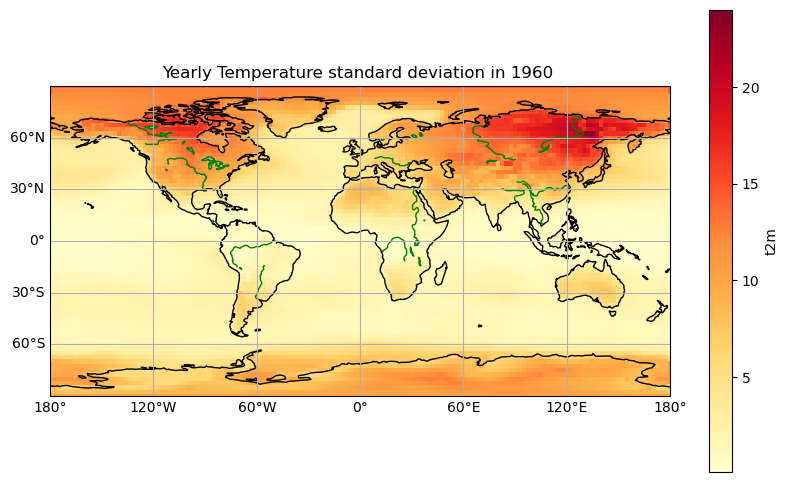

In [53]:
clima.display_std(year_count=1) #Display standard deviation for year at index 1

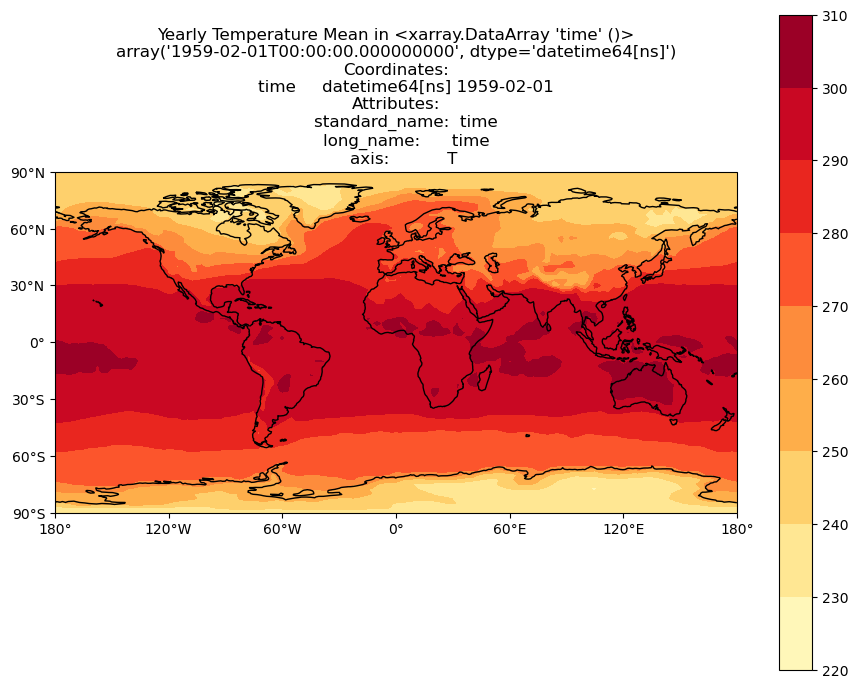

In [54]:
clima.display_mean(1) #1 stands for year by counting from 1, 2, ... as list of year

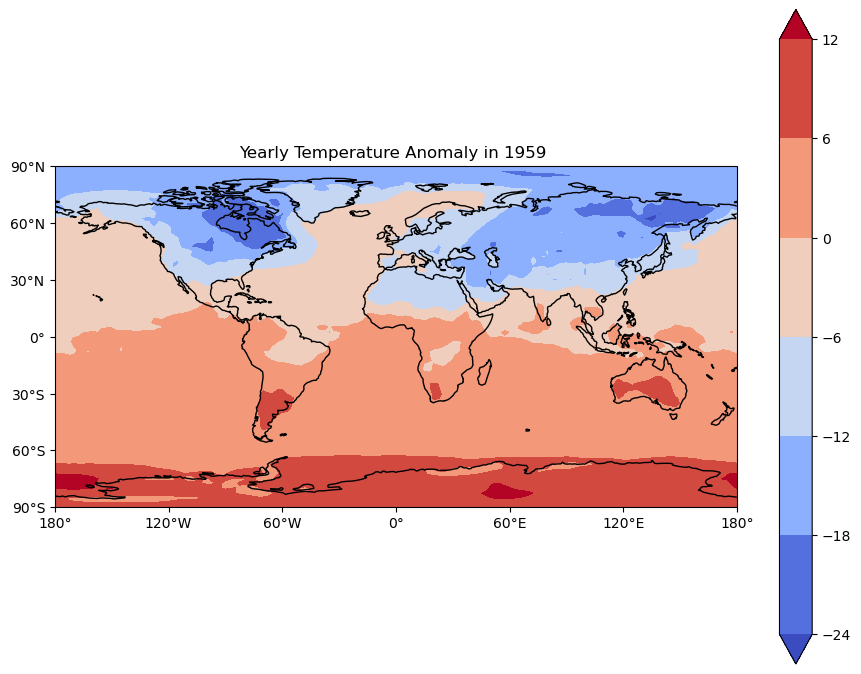

In [55]:
clima.display_anomaly(1)# Here from 1-12 is one year, 13-25 is another year,and so on

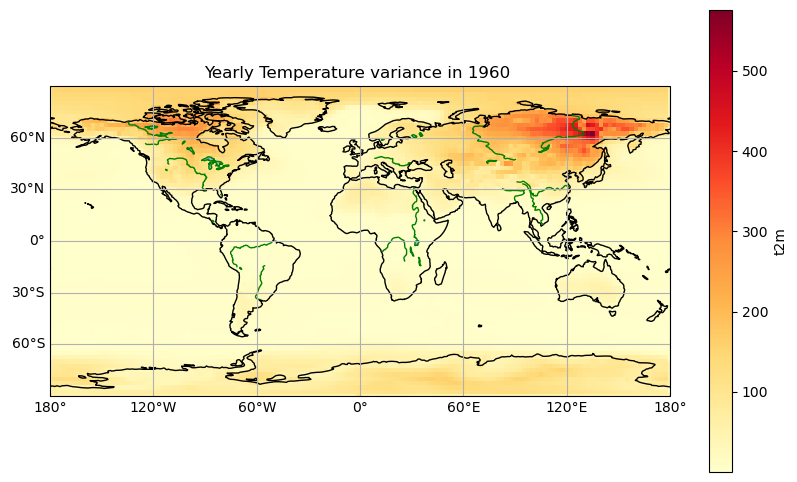

In [56]:
clima.display_var(1) #1 stands for year by counting from 1, 2, ... as list of year